# Julia interop
Illustrate calling la_figures from Julia via PythonCall/PyCall.

Run this notebook with a Julia kernel. These examples use PythonCall to import `la_figures` and render SVG output in a Julia notebook. If you run in a REPL, write the SVG to a file instead of calling `display`.

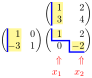

In [1]:
using PythonCall

la = pyimport("la_figures")
A = [1 2; 3 4]

svg = pyconvert(String, la.ge_tbl_svg(A))

function show_svg(svg::AbstractString; path::AbstractString="output.svg")
    if isdefined(Main, :IJulia)
        display(MIME"image/svg+xml"(), svg)
    else
        open(path, "w") do io
            write(io, svg)
        end
        @info "Wrote SVG" path
    end
end

show_svg(svg)

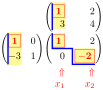

In [2]:
using PythonCall

la = pyimport("la_figures")

A = [1 2; 3 4]

spec = la.ge_tbl_spec(A, show_pivots=true)

svg = la.ge_tbl_svg(A, show_pivots=true)
show_svg(pyconvert(String, svg); path="output_spec.svg")